In [34]:
# Importing necessary libraries
import numpy as np
import time
import pandas as pd
import seaborn as sns
sns.set_style('dark')
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import os

# Importing dataset
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Scaling
from sklearn.preprocessing import RobustScaler, LabelEncoder

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

/kaggle/input/insurance/insurance.csv


In [35]:
# Load the data
data = pd.read_csv("/kaggle/input/insurance/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploring the data
# Fields and data types 🗒️:

- **age**: age of primary beneficiary. `integer`
- **sex**: insurance contractor gender, female, male. `object`
- **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9. `float`
- **children**:  Number of children covered by health insurance / Number of dependents. `integer`
- **smoker**: Smoking. `object`
- **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.`object`
- **charges**: Individual medical costs billed by health insurance. `float`

# Understanding Data

In [36]:
data.shape

(1338, 7)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Now i going to checking the number of unique values in each column

In [38]:
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]
pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [39]:
print("=".center(50, "="))
cat_cols = ['sex', 'smoker', 'region']
num_cols = ['age', 'bmi', 'children']
target_col = ['charges']  
print("The categorical cols are : ", cat_cols)
print("The continuous cols are : ", num_cols)
print("The target variable is :  ", target_col if target_col else "None")
print("=".center(50, "="))

The categorical cols are :  ['sex', 'smoker', 'region']
The continuous cols are :  ['age', 'bmi', 'children']
The target variable is :   ['charges']


# Summary Statistics

In [40]:
data[num_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.00000,39.0,51.00000,64.00
bmi,1338.0,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,1.094918,1.205493,0.00,0.00000,1.0,2.00000,5.00


# Missing values

In [41]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# EDA (Exploratory Data Analysis)

In [42]:
print("=".center(50, "="))
print('sex : ', data['sex'].unique())
print('smoker : ', data['smoker'].unique())
print('region : ', data['region'].unique())
print("=".center(50, "="))

sex :  ['female' 'male']
smoker :  ['yes' 'no']
region :  ['southwest' 'southeast' 'northwest' 'northeast']


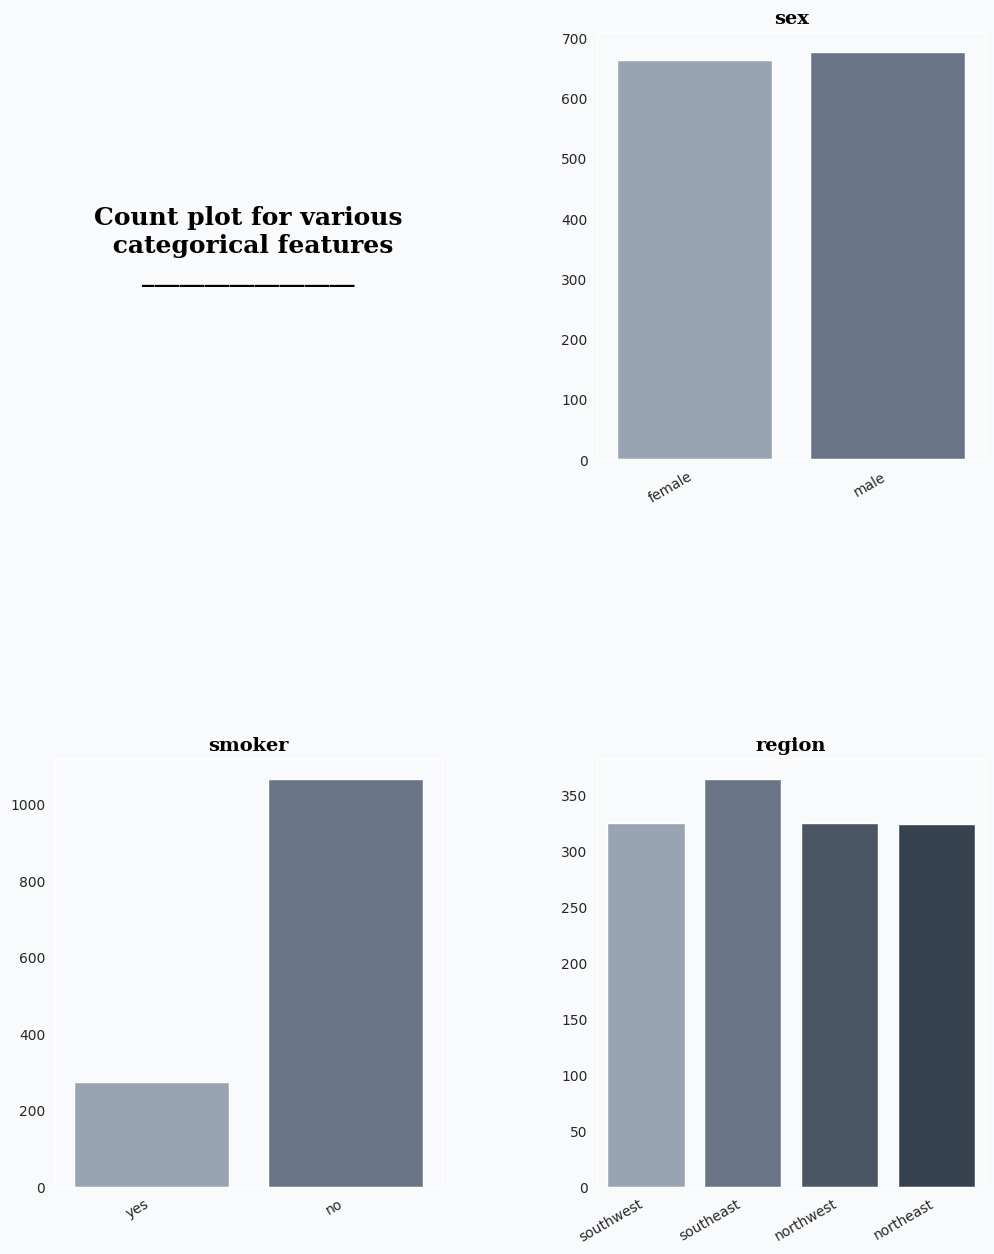

In [43]:
# Larger size for better visualization
fig = plt.figure(figsize=(12, 15))  
gs = fig.add_gridspec(2, 2)
# Increases space between subplots
gs.update(wspace=0.4, hspace=0.7)  


background_color = "#f8fafc"
color_palette = ["#94a3b8", "#64748b", "#475569", "#334155", "#1e293b"]
fig.patch.set_facecolor(background_color)
axes = [fig.add_subplot(gs[i,j]) for i in range(2) for j in range(2)]
for ax in axes:
    ax.set_facecolor(background_color)

# Title of the plot
axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Count plot for various\n categorical features\n_________________',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=18, fontweight='bold',
             fontfamily='serif',
             color="#000000")

# Plot for each categorical feature
plot_features = cat_cols
titles = cat_cols

for i, feature in enumerate(plot_features):
    ax = axes[i + 1]
    ax.set_title(titles[i], loc='center', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    sns.countplot(ax=ax, data=data, x=feature, palette=color_palette)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=10)

# Adjust and show
plt.show()

## Bivariate Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


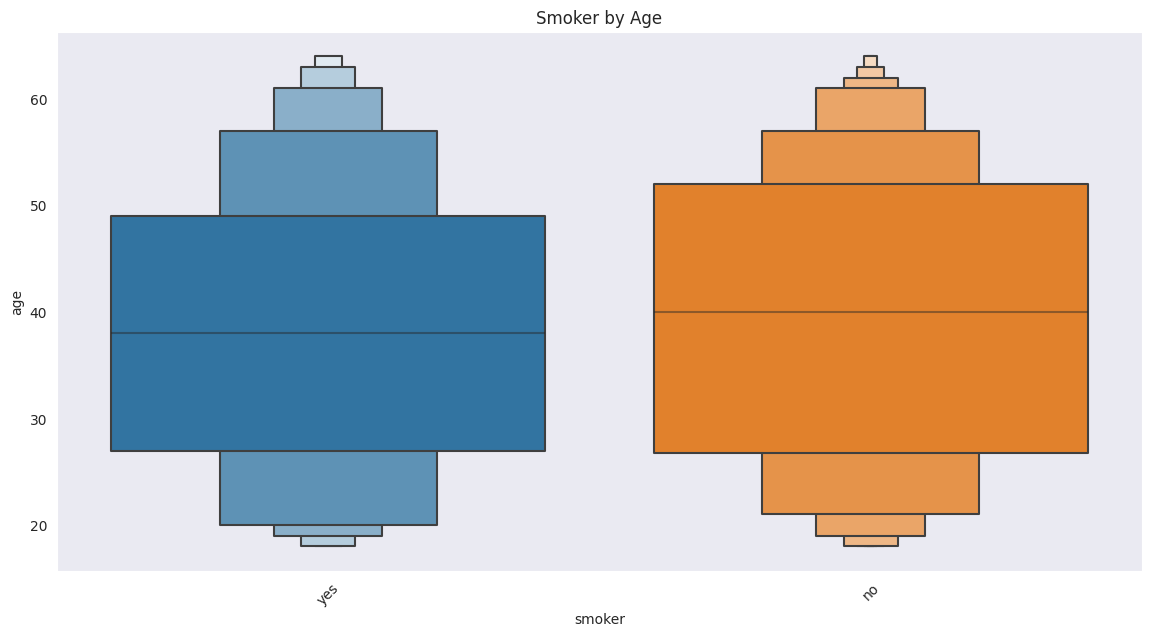

In [44]:
# Smoker by Age
plt.figure(figsize=(14, 7))
sns.boxenplot(x='smoker', y='age', data=data)
plt.title('Smoker by Age')
plt.xticks(rotation=45)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


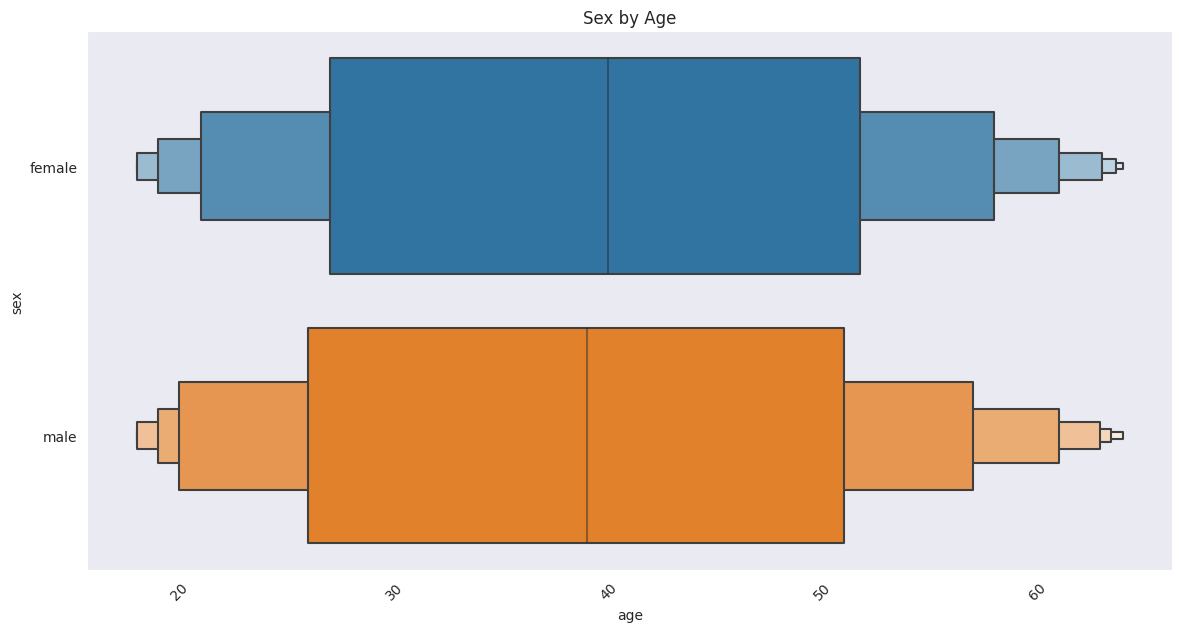

In [45]:
# Sex by Age
plt.figure(figsize=(14, 7))
sns.boxenplot(x='age', y='sex', data=data)
plt.title('Sex by Age')
plt.xticks(rotation=45)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


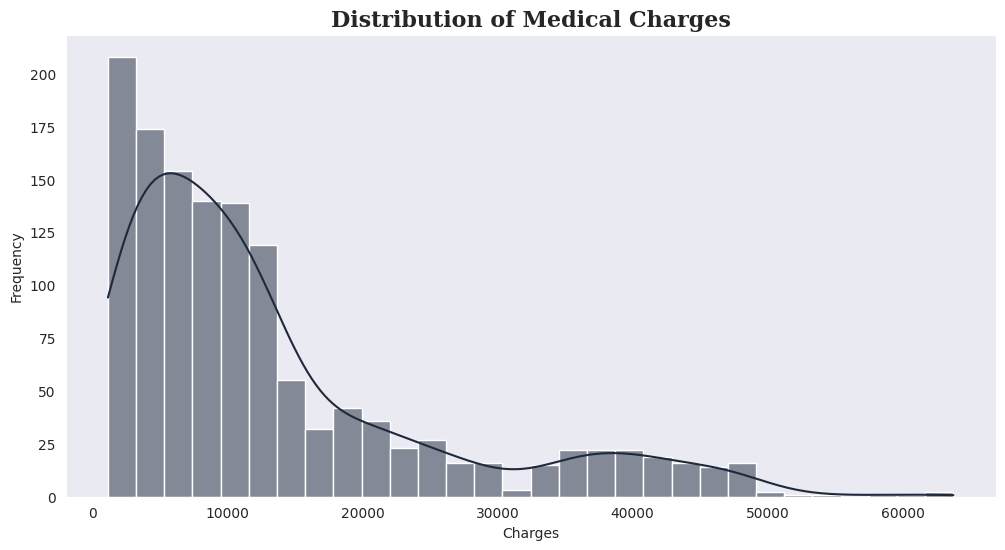

In [46]:
# Distribution of Medical Charges
plt.figure(figsize=(12, 6))
sns.histplot(data['charges'], kde=True, bins=30, color='#1e293b')
plt.title('Distribution of Medical Charges', fontsize=16, fontweight='bold', fontfamily='serif')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

Understanding the distribution of the target variable can guide the choice of models and transformations.

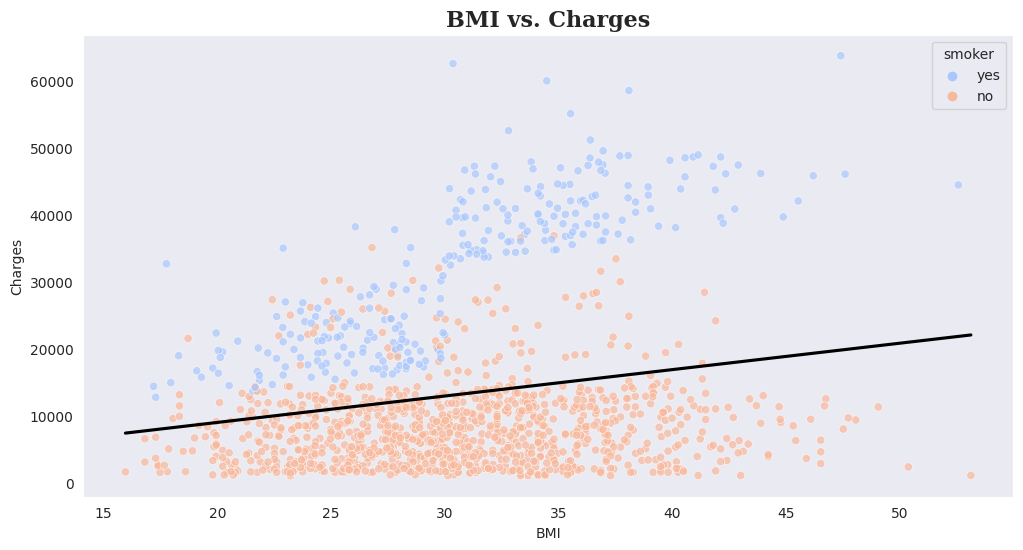

In [47]:
# BMI vs. Charges
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='bmi', y='charges', hue='smoker', palette='coolwarm', alpha=0.7)
sns.regplot(data=data, x='bmi', y='charges', scatter=False, color='black', ci=None)
plt.title('BMI vs. Charges', fontsize=16, fontweight='bold', fontfamily='serif')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


This plot shows how BMI affects medical charges and highlights differences between smokers and non-smokers.

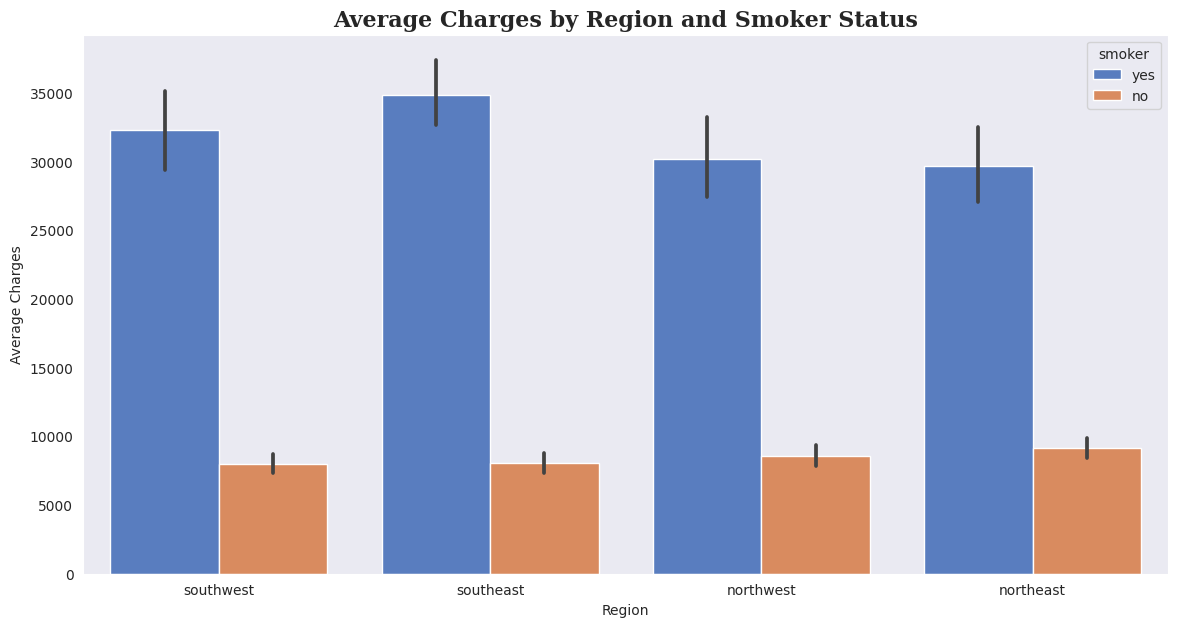

In [48]:
# Charges by Region and Smoker Status
plt.figure(figsize=(14, 7))
sns.barplot(data=data, x='region', y='charges', hue='smoker', palette='muted')
plt.title('Average Charges by Region and Smoker Status', fontsize=16, fontweight='bold', fontfamily='serif')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()

This barplot provides regional insights and the effect of smoking on charges.

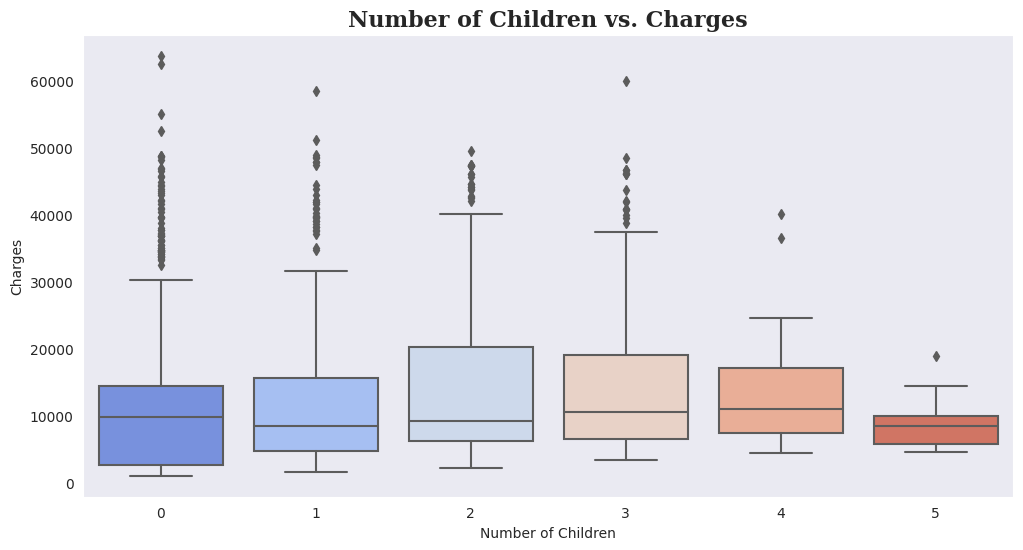

In [49]:
# Children vs. Charges
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='children', y='charges', palette='coolwarm')
plt.title('Number of Children vs. Charges', fontsize=16, fontweight='bold', fontfamily='serif')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

Boxplots highlight the variation in charges based on the number of children covered.

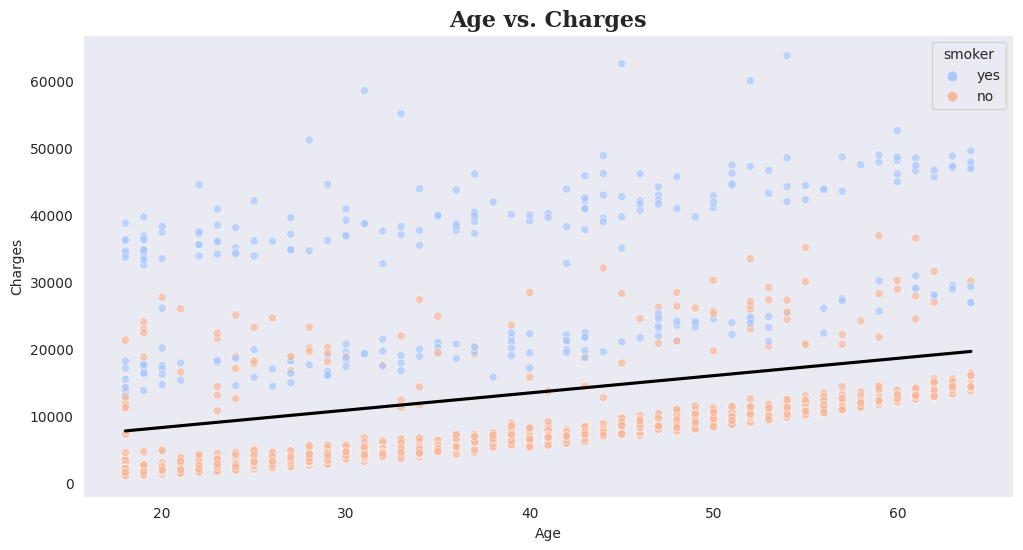

In [50]:
# Age vs. Charges
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='age', y='charges', hue='smoker', palette='coolwarm', alpha=0.7)
sns.regplot(data=data, x='age', y='charges', scatter=False, color='black', ci=None)
plt.title('Age vs. Charges', fontsize=16, fontweight='bold', fontfamily='serif')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


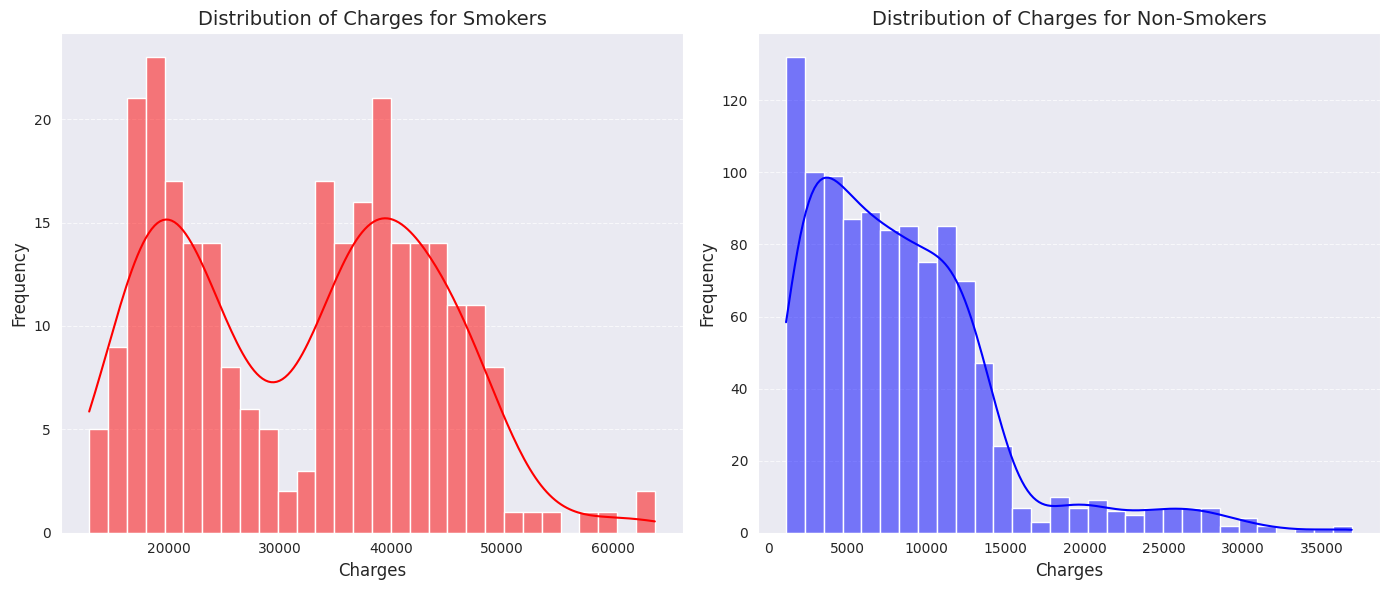

In [51]:
# Distribution of charges for smokers and non-smokers
plt.figure(figsize=(14, 6))

# Distribution of charges for smokers
plt.subplot(1, 2, 1)
sns.histplot(data=data[data['smoker'] == 'yes'], x='charges', kde=True, color='red', bins=30)
plt.title("Distribution of Charges for Smokers", fontsize=14)
plt.xlabel("Charges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Distribution of charges for non-smokers
plt.subplot(1, 2, 2)
sns.histplot(data=data[data['smoker'] == 'no'], x='charges', kde=True, color='blue', bins=30)
plt.title("Distribution of Charges for Non-Smokers", fontsize=14)
plt.xlabel("Charges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

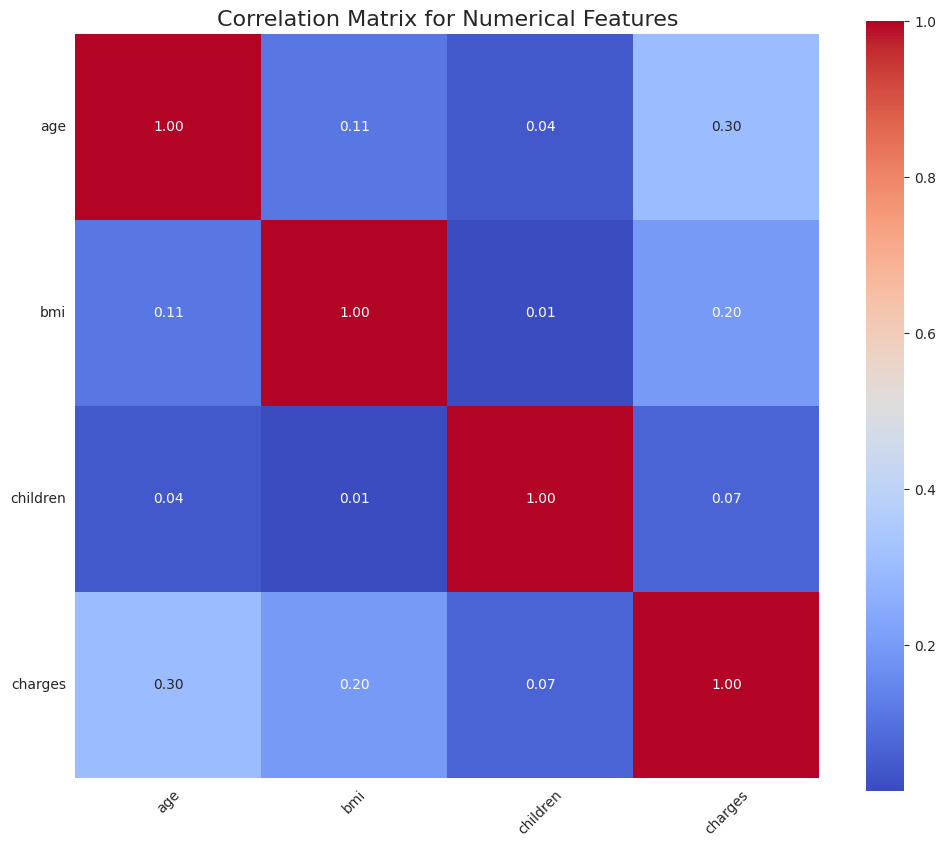

In [52]:
# Filter only numerical columns
num_data = data.select_dtypes(include=[np.number])  

# Create the correlation matrix
corr = num_data.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix for Numerical Features", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

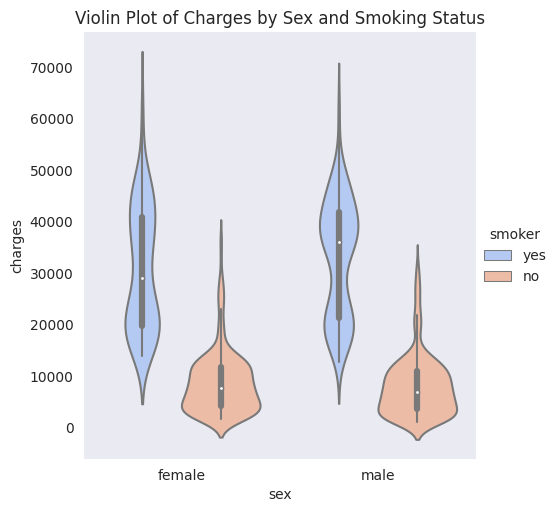

In [53]:
# Violin Plot of Charges by Sex and Smoking Status
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette='coolwarm') \
    .set(title="Violin Plot of Charges by Sex and Smoking Status")

plt.show()

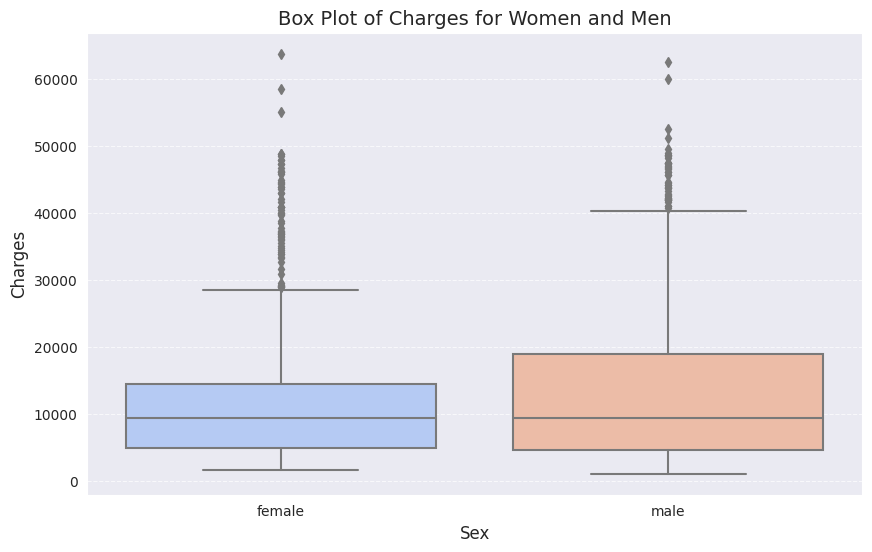

In [54]:
# Box plot for charges of women and men
plt.figure(figsize=(10, 6))

sns.boxplot(data=data, x='sex', y='charges', palette='coolwarm')

plt.title("Box Plot of Charges for Women and Men", fontsize=14)
plt.xlabel("Sex", fontsize=12)
plt.ylabel("Charges", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


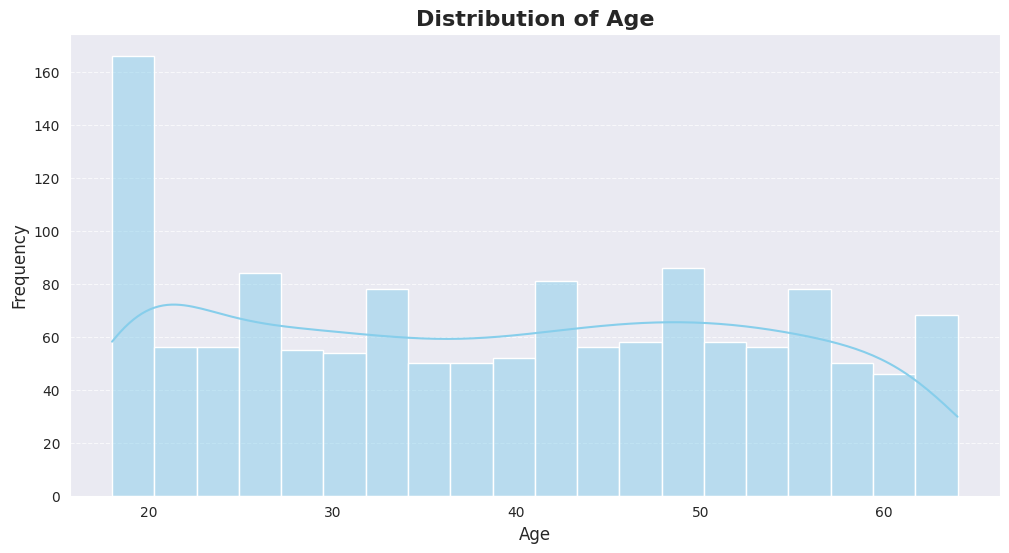

In [55]:
# Distribution of Age
plt.figure(figsize=(12, 6))
sns.histplot(data['age'], kde=True, color='skyblue', bins=20)
plt.title("Distribution of Age", fontsize=16, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Text(0.5, 1.02, 'The number of smokers and non-smokers (18 years old)')

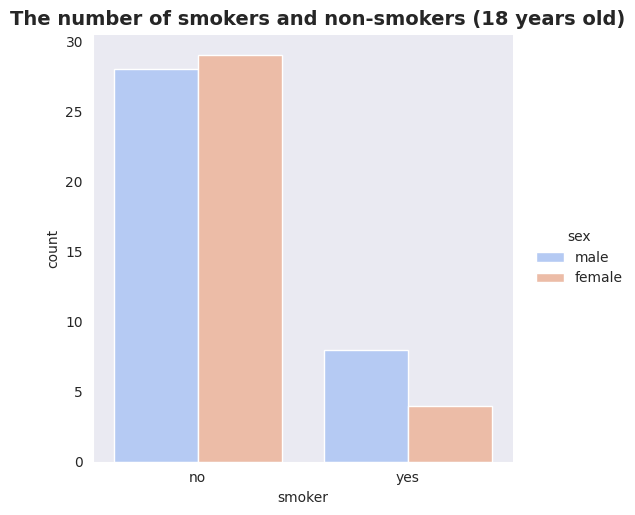

In [56]:
# Corrected Code
plot = sns.catplot(x="smoker", kind="count", hue="sex", palette="coolwarm", 
                   data=data[data.age == 18])
plot.fig.suptitle("The number of smokers and non-smokers (18 years old)", 
                  y=1.02, fontsize=14, fontweight="bold")


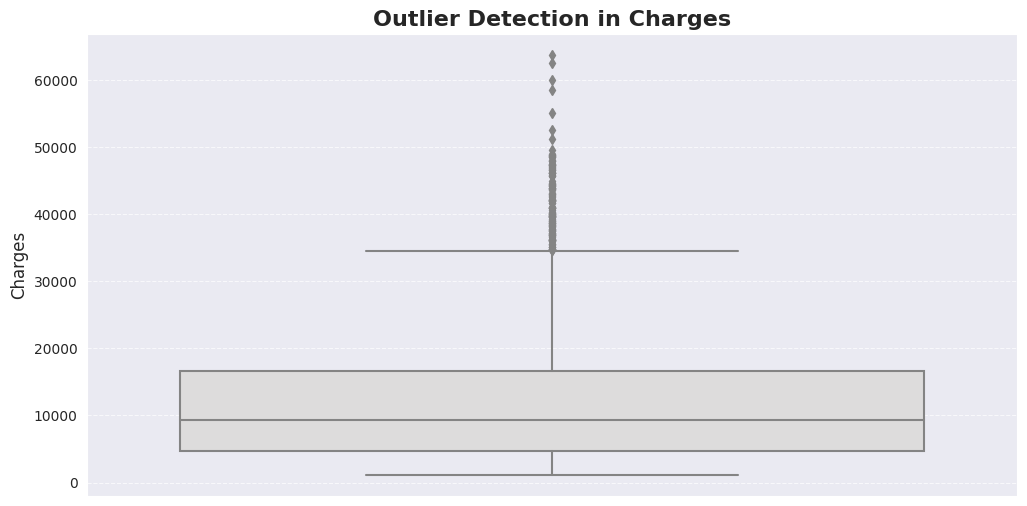

In [57]:
# Outlier detection using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, y='charges', palette='coolwarm')
plt.title("Outlier Detection in Charges", fontsize=16, fontweight='bold')
plt.ylabel("Charges", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


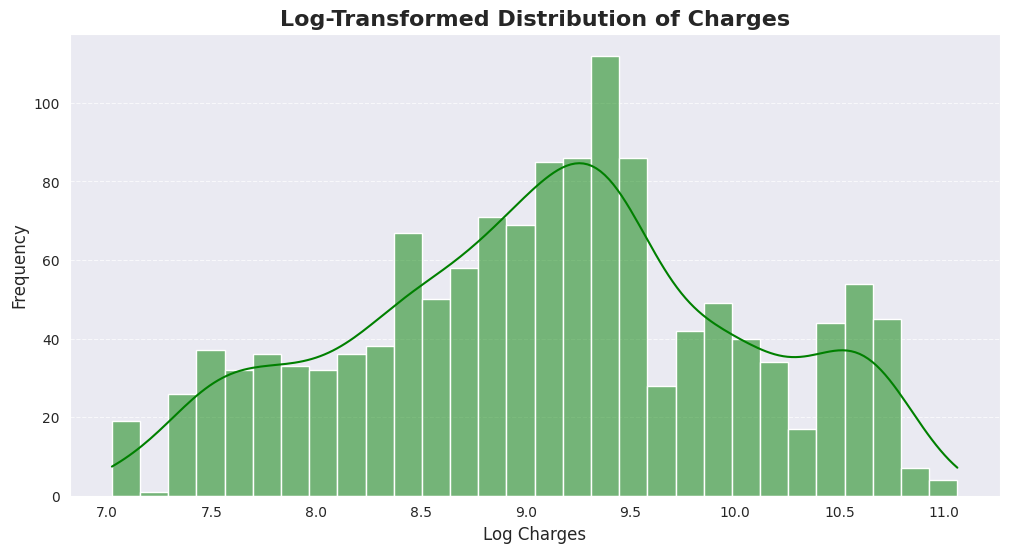

In [58]:
# Log transformation
data['log_charges'] = np.log(data['charges'])

# Plot the transformed data
plt.figure(figsize=(12, 6))
sns.histplot(data['log_charges'], kde=True, color='green', bins=30)
plt.title("Log-Transformed Distribution of Charges", fontsize=16, fontweight='bold')
plt.xlabel("Log Charges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


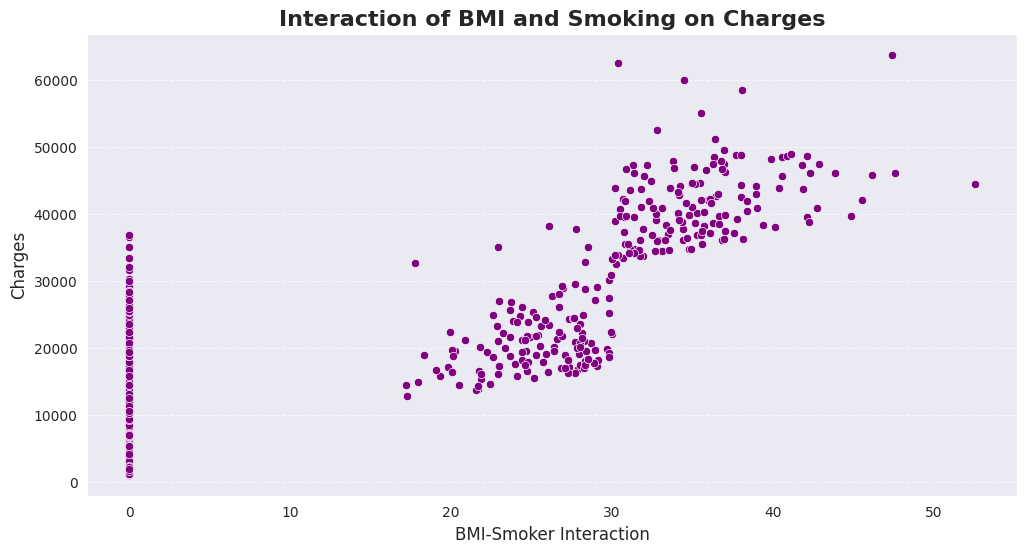

In [59]:
# Interaction term: BMI and smoker
data['bmi_smoker'] = data['bmi'] * (data['smoker'] == 'yes').astype(int)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='bmi_smoker', y='charges', data=data, color='purple')
plt.title("Interaction of BMI and Smoking on Charges", fontsize=16, fontweight='bold')
plt.xlabel("BMI-Smoker Interaction", fontsize=12)
plt.ylabel("Charges", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [60]:
# ANOVA for categorical features
from scipy.stats import f_oneway

anova_result = f_oneway(data[data['smoker'] == 'yes']['charges'],
                        data[data['smoker'] == 'no']['charges'])

print(f"ANOVA test for smoker and charges: p-value = {anova_result.pvalue}")


ANOVA test for smoker and charges: p-value = 8.271435842182967e-283


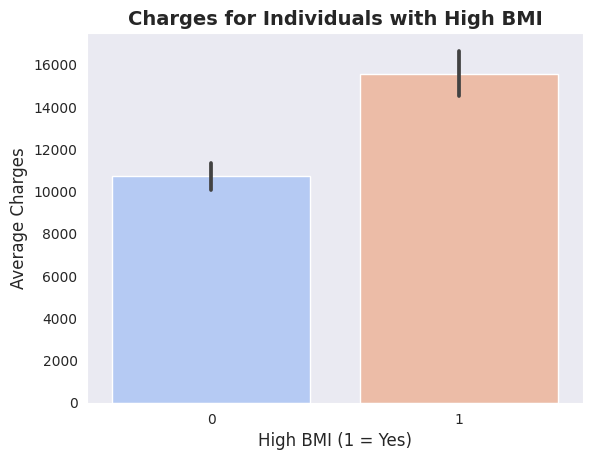

In [61]:
# New features

data['charge_per_child'] = data['charges'] / (data['children'] + 1)  
data['high_bmi'] = (data['bmi'] > 30).astype(int)

# Plot the new feature
sns.barplot(x='high_bmi', y='charges', data=data, palette='coolwarm')
plt.title("Charges for Individuals with High BMI", fontsize=14, fontweight='bold')
plt.xlabel("High BMI (1 = Yes)", fontsize=12)
plt.ylabel("Average Charges", fontsize=12)
plt.show()


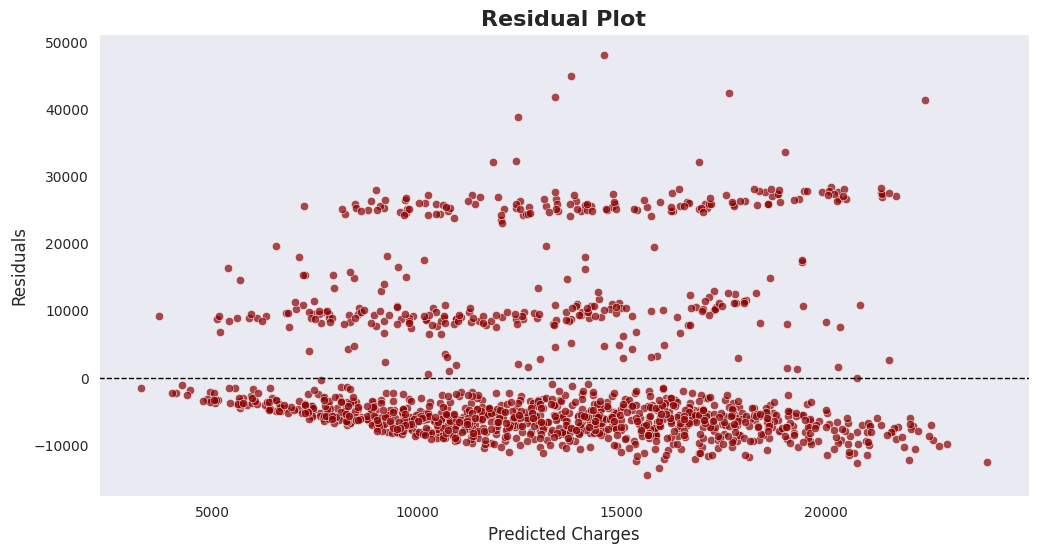

In [62]:
# Simple regression for residual analysis
from sklearn.linear_model import LinearRegression

X = data[['age', 'bmi']]
y = data['charges']
model = LinearRegression()
model.fit(X, y)
residuals = y - model.predict(X)

# Residuals plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=model.predict(X), y=residuals, color='darkred', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title("Residual Plot", fontsize=16, fontweight='bold')
plt.xlabel("Predicted Charges", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.show()


# Making features model ready
## Scaling and Encoding features

In [63]:
# Creating a copy of data
data_copy = data

# Define the columns to be encoded and scaled
cat_cols = ['sex', 'smoker', 'region']
num_cols = ['age', 'bmi', 'children']

# Encoding the categorical columns
data_copy = pd.get_dummies(data_copy, columns = cat_cols, drop_first = True)

# Defining the feature and target
X = data_copy.drop(['charges'], axis=1)
y = data_copy[['charges']]

# Instantiating the Scaler
scaler = RobustScaler()

# Scaling the continuous features
X[num_cols] = scaler.fit_transform(X[num_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,bmi,children,log_charges,bmi_smoker,charge_per_child,high_bmi,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-0.833333,-0.297708,-0.5,9.734176,27.9,16884.92400,0,False,True,False,False,True
1,-0.875000,0.401310,0.0,7.453302,0.0,862.77615,1,True,False,False,True,False
2,-0.458333,0.309616,1.0,8.400538,0.0,1112.36550,1,True,False,False,True,False
3,-0.250000,-0.916344,-0.5,9.998092,0.0,21984.47061,0,True,False,True,False,False
4,-0.291667,-0.181006,-0.5,8.260197,0.0,3866.85520,0,True,False,True,False,False


## Train and test split

In [64]:
print("=".center(50, "="))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is: ", X_train.shape)
print("The shape of X_test is: ",X_test.shape)
print("The shape of y_train is: ",y_train.shape)
print("The shape of y_test is: ",y_test.shape)
print("=".center(50, "="))

The shape of X_train is:  (1070, 12)
The shape of X_test is:  (268, 12)
The shape of y_train is:  (1070, 1)
The shape of y_test is:  (268, 1)


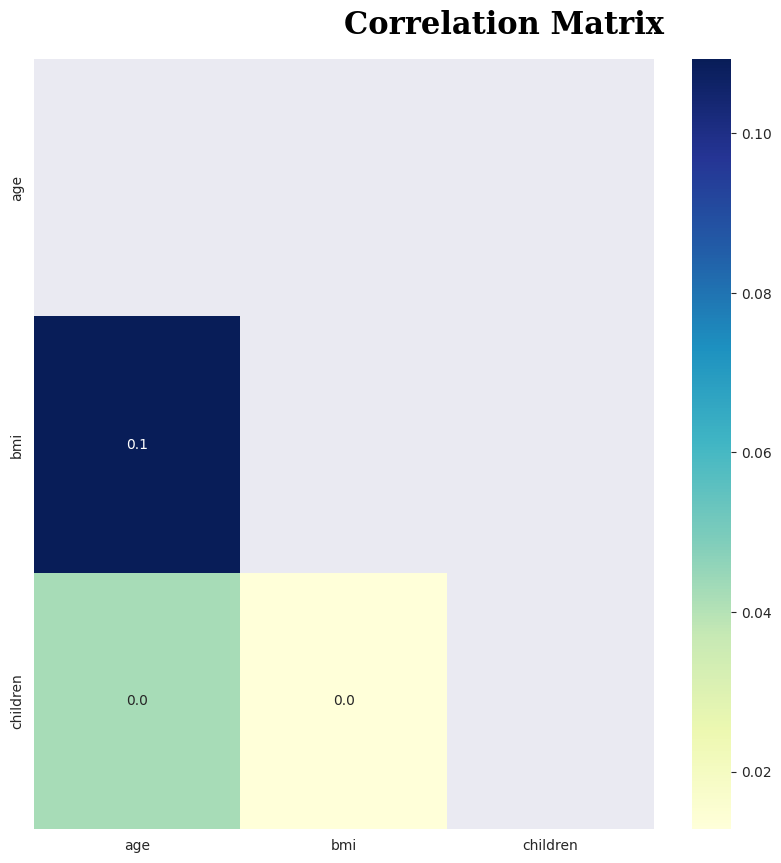

In [65]:
data_corr = data[num_cols].corr()
data_corr


fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#94a3b8","#64748b"]
mask = np.triu(np.ones_like(data_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_corr = data[num_cols].corr().transpose()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

# Modeling

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Preparing data
X = data.drop('charges', axis=1)
y = data['charges']

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Training and evaluating each model
for name, model in models.items():
    # Fit model
    model.fit(X_train_scaled, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Output metrics
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print("=".center(50, "="))

Model: Linear Regression
Mean Squared Error: 7688326.91
Root Mean Squared Error: 2772.78
R^2 Score: 0.95
Model: Ridge Regression
Mean Squared Error: 7663009.51
Root Mean Squared Error: 2768.21
R^2 Score: 0.95
Model: Lasso Regression
Mean Squared Error: 7682818.44
Root Mean Squared Error: 2771.79
R^2 Score: 0.95
Model: Random Forest
Mean Squared Error: 109069.06
Root Mean Squared Error: 330.26
R^2 Score: 1.00
Model: Gradient Boosting
Mean Squared Error: 32337.96
Root Mean Squared Error: 179.83
R^2 Score: 1.00
